In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import random

# Configuration visuelle
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

In [7]:
def generer_noms(n=24):
    noms = ["Alice", "Bob", "Charlie", "Diana", "Emma", "Frank", "Grace", "Henry", 
            "Iris", "Jack", "Kate", "Leo", "Maria", "Nathan", "Olivia", "Paul", 
            "Quinn", "Rose", "Sam", "Tom", "Uma", "Victor", "Wendy", "Xavier"]
    return noms[:n]

n = 24
sizes = [8, 8, 8]
probs = [[0.4, 0.05, 0.05], [0.05, 0.4, 0.05], [0.05, 0.05, 0.4]]

G_base = nx.stochastic_block_model(sizes, probs, seed=42)
mapping = {i: generer_noms(n)[i] for i in range(n)}
G = nx.relabel_nodes(G_base, mapping)

print(f" Graphe créé avec {G.number_of_nodes()} nœuds et {G.number_of_edges()} arêtes.")

 Graphe créé avec 24 nœuds et 61 arêtes.


In [8]:
partition = community_louvain.best_partition(G)
modularity = community_louvain.modularity(partition, G)

print(f" Score de Modularité (Q) : {modularity:.4f}")
print(f" Nombre de communautés détectées : {len(set(partition.values()))}")

 Score de Modularité (Q) : 0.4131
 Nombre de communautés détectées : 3


In [6]:
intra_edges = sum(1 for u, v in G.edges() if partition[u] == partition[v])
inter_edges = G.number_of_edges() - intra_edges

print(f" Relations Internes (Intra-groupe) : {intra_edges}")
print(f" Relations Externes (Inter-groupe) : {inter_edges}")
print(f" Ratio de Cohésion : {intra_edges/G.number_of_edges():.2%}")

 Relations Internes (Intra-groupe) : 46
 Relations Externes (Inter-groupe) : 15
 Ratio de Cohésion : 75.41%


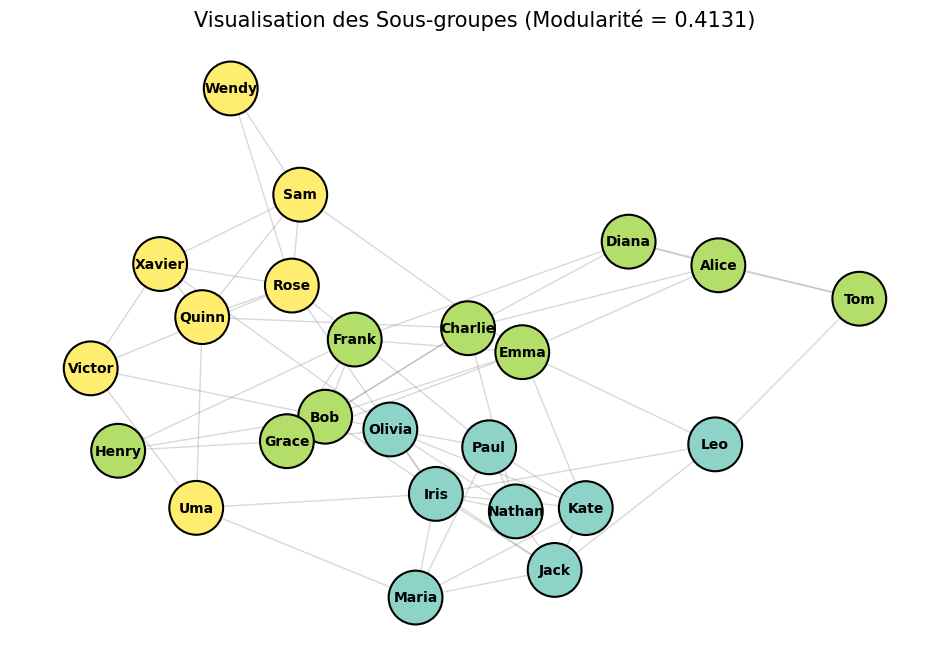

In [9]:
pos = nx.spring_layout(G, k=0.5, seed=42)
plt.figure(figsize=(12, 8))

nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')


node_colors = [partition[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color=node_colors, 
                       cmap=plt.cm.Set3, edgecolors='black', linewidths=1.5)


nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title(f"Visualisation des Sous-groupes (Modularité = {modularity:.4f})", fontsize=15)
plt.axis('off')
plt.show()